In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
train_df = pd.read_csv('training_data.csv')

In [3]:
train_df.columns

Index(['Open(t-4)', 'Open(t-3)', 'Open(t-2)', 'Open(t-1)', 'Open(t)',
       'High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)',
       'Low(t-4)', 'Low(t-3)', 'Low(t-2)', 'Low(t-1)', 'Low(t)',
       'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)',
       'Close_x(t)', 'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)',
       'Close_y(t-1)', 'Close_y(t)', 'Volume(t-4)', 'Volume(t-3)',
       'Volume(t-2)', 'Volume(t-1)', 'Volume(t)', 'Average_Likes(t-4)',
       'Average_Likes(t-3)', 'Average_Likes(t-2)', 'Average_Likes(t-1)',
       'Average_Likes(t)', 'Tweets_Volume(t-4)', 'Tweets_Volume(t-3)',
       'Tweets_Volume(t-2)', 'Tweets_Volume(t-1)', 'Tweets_Volume(t)',
       'reddit_sentiment(t-4)', 'reddit_sentiment(t-3)',
       'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
       'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)',
       'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
       'twitter_sentiment(t)', 'roe', 'infl', 

## Preprocessing

### Generate Column Ordering

In [4]:
# time series columns
cols_series = ['Open', 'High', 'Low', 'Close_x', 'Close_y', 'Volume', 'Average_Likes', 'Tweets_Volume','reddit_sentiment', 'twitter_sentiment' ]
# uni value columns
cols_unival = ['roe', 'infl', 'Close_x1(t+1)']

In [5]:
col_order = []
cur = pd.Series(train_df.columns)

for col in cols_series:
    filtered = list(cur[cur.str.startswith(col)])
    if (col == 'Close_x'):
        filtered.remove('Close_x1(t+1)')
    col_order.extend(filtered)

col_order.extend(cols_unival)

In [6]:
col_order

['Open(t-4)',
 'Open(t-3)',
 'Open(t-2)',
 'Open(t-1)',
 'Open(t)',
 'High(t-4)',
 'High(t-3)',
 'High(t-2)',
 'High(t-1)',
 'High(t)',
 'Low(t-4)',
 'Low(t-3)',
 'Low(t-2)',
 'Low(t-1)',
 'Low(t)',
 'Close_x(t-4)',
 'Close_x(t-3)',
 'Close_x(t-2)',
 'Close_x(t-1)',
 'Close_x(t)',
 'Close_y(t-4)',
 'Close_y(t-3)',
 'Close_y(t-2)',
 'Close_y(t-1)',
 'Close_y(t)',
 'Volume(t-4)',
 'Volume(t-3)',
 'Volume(t-2)',
 'Volume(t-1)',
 'Volume(t)',
 'Average_Likes(t-4)',
 'Average_Likes(t-3)',
 'Average_Likes(t-2)',
 'Average_Likes(t-1)',
 'Average_Likes(t)',
 'Tweets_Volume(t-4)',
 'Tweets_Volume(t-3)',
 'Tweets_Volume(t-2)',
 'Tweets_Volume(t-1)',
 'Tweets_Volume(t)',
 'reddit_sentiment(t-4)',
 'reddit_sentiment(t-3)',
 'reddit_sentiment(t-2)',
 'reddit_sentiment(t-1)',
 'reddit_sentiment(t)',
 'twitter_sentiment(t-4)',
 'twitter_sentiment(t-3)',
 'twitter_sentiment(t-2)',
 'twitter_sentiment(t-1)',
 'twitter_sentiment(t)',
 'roe',
 'infl',
 'Close_x1(t+1)']

In [7]:
# Order the dataframe columns for scaling
train_df = train_df[col_order]

### Row MinMax Scaling

In [8]:
train_scaled = train_df.copy()

In [9]:
train_scaled.columns

Index(['Open(t-4)', 'Open(t-3)', 'Open(t-2)', 'Open(t-1)', 'Open(t)',
       'High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)',
       'Low(t-4)', 'Low(t-3)', 'Low(t-2)', 'Low(t-1)', 'Low(t)',
       'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)',
       'Close_x(t)', 'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)',
       'Close_y(t-1)', 'Close_y(t)', 'Volume(t-4)', 'Volume(t-3)',
       'Volume(t-2)', 'Volume(t-1)', 'Volume(t)', 'Average_Likes(t-4)',
       'Average_Likes(t-3)', 'Average_Likes(t-2)', 'Average_Likes(t-1)',
       'Average_Likes(t)', 'Tweets_Volume(t-4)', 'Tweets_Volume(t-3)',
       'Tweets_Volume(t-2)', 'Tweets_Volume(t-1)', 'Tweets_Volume(t)',
       'reddit_sentiment(t-4)', 'reddit_sentiment(t-3)',
       'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
       'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)',
       'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
       'twitter_sentiment(t)', 'roe', 'infl', 

In [10]:
# transformation dictionary to store each row's minimum value and range (max-min)
trform_list = {}

In [11]:
def minmaxscaler(index, row, in_size, num_var):
    trform_dict = {}
    trformed_row = []
    value = 0
    for i in range(num_var):
        cur = np.array(row[ i*in_size : (i+1)*in_size ])
        rowmaxmin = cur.max() - cur.min()
        print('rowmaxmin', rowmaxmin)
        rowmin = cur.min()
        print('rowmin', rowmin)
        trform_dict[i] = [rowmaxmin, rowmin]
        trform_list[index] = trform_dict
        cur = [ (x - rowmin) / (rowmaxmin) for x in cur]
        trformed_row.extend(cur)
        if (i == 3):
            target = row[-1]
            value = (target - rowmin) / rowmaxmin
    
    rest = np.array(row[ num_var*in_size : -1 ])
    trformed_row.extend(rest)
    trformed_row.append(value)
    return trformed_row
                    

In [12]:
for index, row in train_scaled.iterrows():
    trformed_row = minmaxscaler(index, row, 5, 8)
    train_scaled.loc[index] = trformed_row

rowmaxmin 4.386064828000329
rowmin 37.64469954219178
rowmaxmin 1.65090734192961
rowmin 41.35737127213854
rowmaxmin 4.66452364174642
rowmin 37.129117884311526
rowmaxmin 1.72845458984375
rowmin 40.82010269165039
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 465456000.0
rowmin 364944800.0
rowmaxmin 1.5851742151109245
rowmin 1.0555014605647517
rowmaxmin 2621.0
rowmin 4779.0
rowmaxmin 1.5074074219748042
rowmin 41.0629207043366
rowmaxmin 1.6066107300115746
rowmin 41.73314634803784
rowmaxmin 1.2168728441418253
rowmin 40.57676868191612
rowmaxmin 2.4664230346679688
rowmin 40.82010269165039
rowmaxmin 86.31005859375
rowmin 2709.800048828125
rowmaxmin 198640400.0
rowmin 364944800.0
rowmaxmin 0.24155930113495705
rowmin 0.864529838852488
rowmaxmin 868.0
rowmin 4779.0
rowmaxmin 2.4897590017422218
rowmin 41.0629207043366
rowmaxmin 3.8495720033273955
rowmin 41.73314634803784
rowmaxmin 2.417169543947253
rowmin 40.98307460171824
rowmaxmin 4.25848388671875
rowmin 41.234710693359375
rowmaxmin

In [13]:
trform_list

{0: {0: [4.386064828000329, 37.64469954219178],
  1: [1.65090734192961, 41.35737127213854],
  2: [4.66452364174642, 37.129117884311526],
  3: [1.72845458984375, 40.82010269165039],
  4: [86.31005859375, 2709.800048828125],
  5: [465456000.0, 364944800.0],
  6: [1.5851742151109245, 1.0555014605647517],
  7: [2621.0, 4779.0]},
 1: {0: [1.5074074219748042, 41.0629207043366],
  1: [1.6066107300115746, 41.73314634803784],
  2: [1.2168728441418253, 40.57676868191612],
  3: [2.4664230346679688, 40.82010269165039],
  4: [86.31005859375, 2709.800048828125],
  5: [198640400.0, 364944800.0],
  6: [0.24155930113495705, 0.864529838852488],
  7: [868.0, 4779.0]},
 2: {0: [2.4897590017422218, 41.0629207043366],
  1: [3.8495720033273955, 41.73314634803784],
  2: [2.417169543947253, 40.98307460171824],
  3: [4.25848388671875, 41.234710693359375],
  4: [57.33984375, 2775.60009765625],
  5: [244424400.0, 364944800.0],
  6: [0.24155930113495705, 0.864529838852488],
  7: [2272.0, 4779.0]},
 3: {0: [4.51012

In [14]:
train_scaled

,Open(t-4),Open(t-3),Open(t-2),Open(t-1),Open(t),High(t-4),High(t-3),High(t-2),High(t-1),High(t),...,reddit_sentiment(t-1),reddit_sentiment(t),twitter_sentiment(t-4),twitter_sentiment(t-3),twitter_sentiment(t-2),twitter_sentiment(t-1),twitter_sentiment(t),roe,infl,Close_x1(t+1)
0,0.000000,0.912385,0.800851,0.779337,1.000000,0.000000,0.570608,0.227617,0.724460,1.000000,...,0.000000,0.000000,0.127374,0.256366,0.244529,0.207746,0.318402,0.109210,0.190660,1.426953
1,0.387128,0.062601,0.000000,0.642058,1.000000,0.352448,0.000000,0.510541,0.793678,1.000000,...,0.000000,0.000000,0.256366,0.244529,0.207746,0.318402,0.206934,0.109210,0.237069,1.894684
2,0.037901,0.000000,0.388730,0.605443,1.000000,0.000000,0.213073,0.331240,0.417348,1.000000,...,0.000000,0.000000,0.244529,0.207746,0.318402,0.206934,0.247462,0.109210,0.283478,1.040911
3,0.000000,0.214593,0.334227,0.552037,1.000000,0.000000,0.086161,0.148946,0.573785,1.000000,...,0.000000,0.000000,0.207746,0.318402,0.206934,0.247462,0.230397,0.109210,0.329887,1.172295
4,0.000000,0.124233,0.350416,0.815599,1.000000,0.000000,0.068705,0.533599,1.000000,0.758777,...,0.000000,0.000000,0.318402,0.206934,0.247462,0.230397,0.148224,0.109210,0.376296,1.575699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.654363,1.000000,0.000000,0.819390,0.535622,1.000000,0.705909,0.000000,0.475631,0.222729,...,0.000000,0.000000,0.170015,0.066024,0.093421,0.091963,0.043767,0.504836,0.367535,0.551543
196,1.000000,0.000000,0.819390,0.535622,0.269198,1.000000,0.000000,0.673784,0.315520,0.130279,...,0.000000,0.152096,0.066024,0.093421,0.091963,0.043767,0.068209,0.528813,0.304319,0.604801
197,0.000000,1.000000,0.653684,0.328535,0.563930,0.473767,1.000000,0.720192,0.575517,0.000000,...,0.152096,0.158785,0.093421,0.091963,0.043767,0.068209,0.222123,0.528813,0.202989,-2.918726
198,1.000000,0.484239,0.000000,0.350569,0.657000,1.000000,0.720192,0.575517,0.000000,0.424484,...,0.158785,0.000000,0.091963,0.043767,0.068209,0.222123,0.105450,0.528813,0.101658,-0.032608


## Training

In [15]:
score_df = pd.DataFrame(columns=['gs_cv', 'data', "MAE", "MSE", "RMSE", "R2"])

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaled.drop('Close_x1(t+1)',axis=1), train_scaled['Close_x1(t+1)'] ,
                                   random_state=88, 
                                   test_size=0.25, 
                                   shuffle=False)

In [17]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

### LSTM without Grid Search

In [20]:
# Training without GridSearch and CV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

LSTM_model = keras.Sequential()
LSTM_model.add(layers.Embedding(input_dim=5000, output_dim=32))
LSTM_model.add(layers.LSTM(100))
LSTM_model.add(layers.Dense(1, activation='linear'))
LSTM_model.compile(optimizer='adam', loss='mse')

LSTM_model.fit(X_train, y_train)

5/5 [==============================] - 3s 31ms/step - loss: 1.1904


### Accuracy on Test Data (Last 50 Days)

In [21]:
pred = LSTM_model.predict(X_test)
pred_trformed = [pred[x - y_test.index[0]] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]
pred_trformed = np.ravel(np.asarray(pred_trformed, dtype=np.float64))
y_trformed =  [y_test[x] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
score_df.loc[len(score_df)] = [False, 'test', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

2/2 [==============================] - 1s 10ms/step
Mean Absolute Error: 8.665542907714844
Mean Squared Error: 108.9850158962747
Root Mean Squared Error: 10.439588875826226
R-squared: 0.30402548564765175


<Axes: >

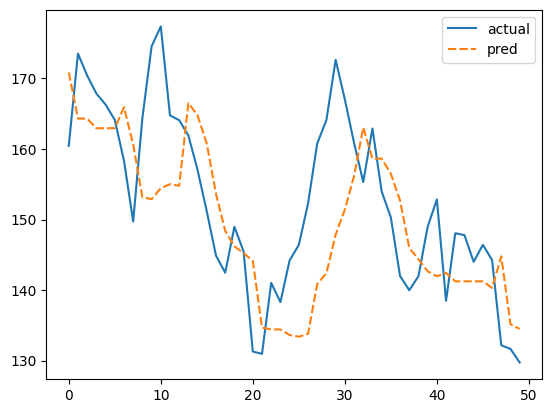

In [22]:
output = pd.DataFrame({'actual': np.array(y_trformed), 'pred': np.array(pred_trformed)})

sns.lineplot(data=output)

### Accuracy on the Complete Data (200 days)

In [23]:
validation_pred = LSTM_model.predict(train_scaled.drop('Close_x1(t+1)',axis=1))
validation_y = train_scaled['Close_x1(t+1)']
v_pred_trformed = [ validation_pred[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]
v_pred_trformed = np.ravel(np.asarray(v_pred_trformed, dtype=np.float64))
v_y_trformed = [ validation_y[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

mae = mean_absolute_error(v_y_trformed, v_pred_trformed)
mse = mean_squared_error(v_y_trformed, v_pred_trformed)
rmse = mean_squared_error(v_y_trformed, v_pred_trformed, squared=False)
r2 = r2_score(v_y_trformed, v_pred_trformed)
score_df.loc[len(score_df)] = [False, 'all', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   


7/7 [==============================] - 0s 10ms/step
Mean Absolute Error: 7.04425245085454
Mean Squared Error: 85.0626156678214
Root Mean Squared Error: 9.222939643509623
R-squared: 0.9471133855494278


<Axes: >

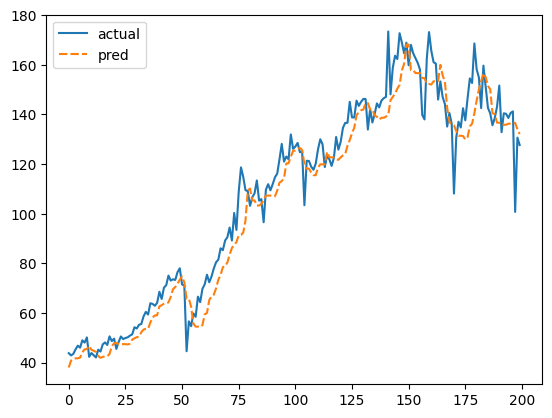

In [24]:
output = pd.DataFrame({'actual': v_y_trformed, 'pred': v_pred_trformed })
sns.lineplot(data=output)

### LSTM with GridSearch

In [25]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# define a function to create the LSTM model
def create_model(units=100, dropout=0.2):
    LSTM_model = keras.Sequential()
    LSTM_model.add(layers.Embedding(input_dim=5000, output_dim=32))
    LSTM_model.add(layers.LSTM(units, dropout=dropout))
    LSTM_model.add(layers.Dense(1, activation='linear'))
    LSTM_model.compile(optimizer='adam', loss='mse')
    return LSTM_model

# create a KerasRegressor object
regressor = KerasRegressor(build_fn=create_model, verbose=0)

# define the hyperparameters to search over
param_grid = {
    'units': [100, 150, 200, 250],
    'dropout': [0.1, 0.2, 0.3],
}

# create a GridSearchCV object
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
# fit the grid search object to the data
grid_result = grid.fit(X_train, y_train, epochs=25, batch_size=1)

# Print results
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

# Use best model to make predictions
best_model = grid.best_estimator_
predictions = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(f'Mean squared error: {mse}')

C:\Users\joshu\AppData\Local\Temp\ipykernel_31932\3713062672.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=create_model, verbose=0)


Best parameters: {'dropout': 0.2, 'units': 200}
Best score: -0.5450023303427519
Mean squared error: 0.9753557879056791


**Best Parameters and model score**

Best parameters: {'units': 200, 'dropout': 0.2}

Best score: -0.5450023303427519

Mean squared error: 0.9753557879056791

In [26]:
# best parameters
best_model = keras.Sequential()
best_model.add(layers.Embedding(input_dim=5000, output_dim=32))
best_model.add(layers.LSTM(200, dropout=0.2))
best_model.add(layers.Dense(1, activation='linear'))
best_model.compile(optimizer='adam', loss='mse')

best_model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
150/150 [==============================] - 5s 18ms/step - loss: 0.6500
Epoch 2/25
150/150 [==============================] - 2s 15ms/step - loss: 0.6082
Epoch 3/25
150/150 [==============================] - 3s 18ms/step - loss: 0.5623
Epoch 4/25
150/150 [==============================] - 3s 18ms/step - loss: 0.5580
Epoch 5/25
150/150 [==============================] - 3s 18ms/step - loss: 0.5610
Epoch 6/25
150/150 [==============================] - 3s 21ms/step - loss: 0.5701
Epoch 7/25
150/150 [==============================] - 3s 19ms/step - loss: 0.5650
Epoch 8/25
150/150 [==============================] - 2s 16ms/step - loss: 0.5639
Epoch 9/25
150/150 [==============================] - 2s 13ms/step - loss: 0.5599
Epoch 10/25
150/150 [==============================] - 2s 14ms/step - loss: 0.5603
Epoch 11/25
150/150 [==============================] - 2s 14ms/step - loss: 0.5542
Epoch 12/25
150/150 [==============================] - 2s 16ms/step - loss: 0.5552
Epoch 13/25
1

### Accuracy on Test Data (Last 50 Days)

In [27]:
pred = best_model.predict(X_test)
pred_trformed = [pred[x - y_test.index[0]] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]
pred_trformed = np.ravel(np.asarray(pred_trformed, dtype=np.float64))
y_trformed =  [y_test[x] * trform_list[x][3][0] + trform_list[x][3][1] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
score_df.loc[len(score_df)] = [True, 'test', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   

2/2 [==============================] - 1s 16ms/step
Mean Absolute Error: 9.803686828613282
Mean Squared Error: 127.80910556287039
Root Mean Squared Error: 11.305268929259064
R-squared: 0.18381550488935372


<Axes: >

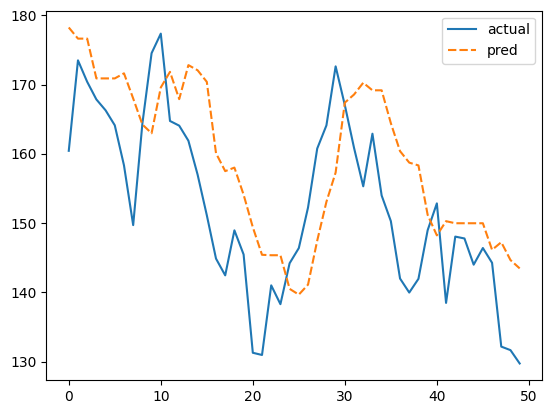

In [28]:
output = pd.DataFrame({'actual': np.array(y_trformed), 'pred': np.array(pred_trformed)})

sns.lineplot(data=output)

### Accuracy on the Complete Data (200 days)

In [29]:
validation_pred = best_model.predict(train_scaled.drop('Close_x1(t+1)',axis=1))
validation_y = train_scaled['Close_x1(t+1)']
v_pred_trformed = [ validation_pred[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]
v_pred_trformed = np.ravel(np.asarray(v_pred_trformed, dtype=np.float64))
v_y_trformed = [ validation_y[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in validation_y.index ]

mae = mean_absolute_error(v_y_trformed, v_pred_trformed)
mse = mean_squared_error(v_y_trformed, v_pred_trformed)
rmse = mean_squared_error(v_y_trformed, v_pred_trformed, squared=False)
r2 = r2_score(v_y_trformed, v_pred_trformed)
score_df.loc[len(score_df)] = [True, 'all', mae, mse, rmse, r2]
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)   


7/7 [==============================] - 0s 21ms/step
Mean Absolute Error: 6.171023624313109
Mean Squared Error: 84.08203839982978
Root Mean Squared Error: 9.169625859315623
R-squared: 0.947723047167568


<Axes: >

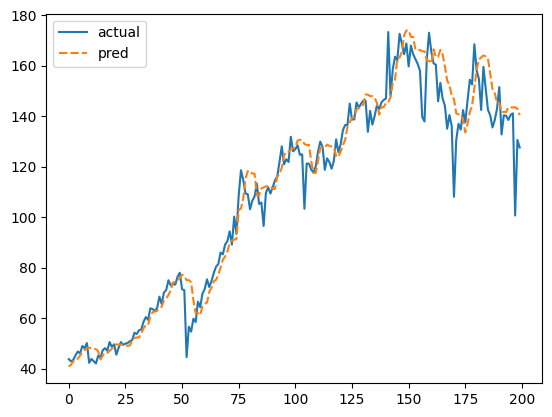

In [30]:
output = pd.DataFrame({'actual': v_y_trformed, 'pred': v_pred_trformed })
sns.lineplot(data=output)

In [31]:
score_df

,gs_cv,data,MAE,MSE,RMSE,R2
0,False,test,8.665543,108.985016,10.439589,0.304025
1,False,all,7.044252,85.062616,9.222940,0.947113
2,True,test,9.803687,127.809106,11.305269,0.183816
3,True,all,6.171024,84.082038,9.169626,0.947723
